4.2 가중치 초기화 함수 실습

In [6]:
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )

        self.fc = nn.Linear(2, 1)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.constant_(module.bias, 0.01)
        print(f"Apply : {module}")

model = Net()


Apply : Linear(in_features=1, out_features=2, bias=True)
Apply : Sigmoid()
Apply : Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
)
Apply : Linear(in_features=2, out_features=1, bias=True)
Apply : Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


파이토치 커스텀 가중치 initialization 실습

In [ ]:
import torch
from torchvision.datasets import MNIST

In [7]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [8]:
from torchvision.datasets import MNIST

train_data = MNIST(root='data', train=True, download=True, transform=transform)
test_data = MNIST(root='data', train=False, download=True, transform=transform)

print(len(train_data), len(test_data))  # (60000, 10000)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.25MB/s]

60000 10000


In [9]:
from torch.utils.data import DataLoader, SubsetRandomSampler
import numpy as np

batch_size = 50
valid_size = 0.2

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)

split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
valid_loader = DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler)
test_loader = DataLoader(test_data, batch_size=batch_size)


In [10]:
for data, target in train_loader:
    print(data.shape)   # torch.Size([50, 1, 28, 28])
    print(target.shape) # torch.Size([50])
    break


torch.Size([50, 1, 28, 28])
torch.Size([50])


Custom Weight Initialization:
Below we will use xavier initialization in the linear layers.

In [11]:
from torch import nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 56)
        self.fc5 = nn.Linear(56, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

model = Model()


In [13]:
import torch
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [14]:
for epoch in range(1, 11):
    train_loss, valid_loss = [], []

    # Training
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        for data, target in valid_loader:
            output = model(data)
            loss = criterion(output, target)
            valid_loss.append(loss.item())

    print(f"Epoch: {epoch}, Training Loss: {np.mean(train_loss)}, Valid Loss: {np.mean(valid_loss)}")


Epoch: 1, Training Loss: 2.023088768993815, Valid Loss: 1.1315483537813027
Epoch: 2, Training Loss: 0.6954552941334744, Valid Loss: 0.4943833685790499
Epoch: 3, Training Loss: 0.41040278888928394, Valid Loss: 0.3597197336765627
Epoch: 4, Training Loss: 0.31696570445783434, Valid Loss: 0.2979084773920476
Epoch: 5, Training Loss: 0.26284024244717635, Valid Loss: 0.2526975001829366
Epoch: 6, Training Loss: 0.21878551958361642, Valid Loss: 0.22551543132091562
Epoch: 7, Training Loss: 0.18647924411731462, Valid Loss: 0.18615645865599315
Epoch: 8, Training Loss: 0.15963350016390904, Valid Loss: 0.16613432626860838
Epoch: 9, Training Loss: 0.13975519275215145, Valid Loss: 0.1527621294061343
Epoch: 10, Training Loss: 0.1241204383065148, Valid Loss: 0.14483920459169894


Other weight initializations coding examples:

- normal Distribution: nn.init.normal_(self.fc1.weight, mean=0, std=1)

- Lecun Normal Distribution: By default, PyTorch uses Lecun initialization, no code changes are required.

- Kaiming (He) Normal Distribution: nn.init.kaiming_normal_(self.fc1.weight)


In [15]:
nn.init.normal_(self.fc1.weight, mean=0, std=1)  # 정규분포 초기화
nn.init.kaiming_normal_(self.fc1.weight)         # He 초기화
# Lecun은 PyTorch 기본값 (별도 설정 필요 없음)


NameError: name 'self' is not defined

Test the network

In [16]:
test_loss = 0.0
class_correct = list(0. for _ in range(10))
class_total = list(0. for _ in range(10))

model.eval()
for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item() * data.size(0)

    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))

    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss /= len(test_loader.dataset)
print('Test Loss: {:.6f}'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(f'Test Accuracy of {i}: {100 * class_correct[i] / class_total[i]:.0f}%')
print(f'\nTest Accuracy (Overall): {100. * np.sum(class_correct) / np.sum(class_total):.0f}%')


Test Loss: 0.133654
Test Accuracy of 0: 99%
Test Accuracy of 1: 99%
Test Accuracy of 2: 96%
Test Accuracy of 3: 98%
Test Accuracy of 4: 95%
Test Accuracy of 5: 96%
Test Accuracy of 6: 96%
Test Accuracy of 7: 93%
Test Accuracy of 8: 94%
Test Accuracy of 9: 95%

Test Accuracy (Overall): 96%


자연어 데이터 증강 실습 (단어 삽입)

- subtitute(대체), delete(삭제)

In [2]:
import nlpaug.augmenter.word as naw
import nltk

texts = [
    'Those who can imagine anything, can create the impossible.',
    'We can only see a short distance ahead, but we can see plenty there that to be done.',
    'If a machine is expected to be infallible, It cannot also be intelligent.',
]

aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action='insert')
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
  print(f'src : {text}')
  print(f'dst : {augmented}')
  print('-------------------------------')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

src : Those who can imagine anything, can create the impossible.
dst : unlike those who can imagine anything, they can create to the very impossible.
-------------------------------
src : We can only see a short distance ahead, but we can see plenty there that to be done.
dst : we can only just see a... short distance ahead, though but we certainly can both see plenty up there that to be done.
-------------------------------
src : If a machine is expected to be infallible, It cannot also be intelligent.
dst : even if a physical machine is generally expected precisely to be infallible, it cannot therefore also necessarily be intelligent.
-------------------------------


이미지 데이터 증강 실습

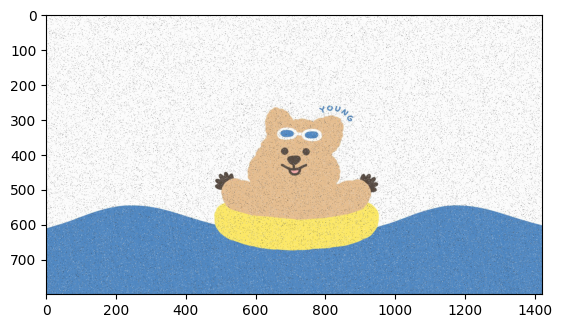

In [3]:
import numpy as np
np.bool = np.bool_ # Deprecated 오류 방지
from PIL import Image
from torchvision import transforms
from imgaug import augmenters as iaa

import matplotlib.pyplot as plt


class IaaTransforms:
  def __init__(self):
    self.seq = iaa.Sequential([
        iaa.SaltAndPepper(p=(0.03, 0.07)),
        iaa.Rain(speed=(0.3, 0.7))
    ])

  def __call__(self, images):
    images = np.array(images)
    augmented = self.seq.augment_image(images)
    return Image.fromarray(augmented)


transform = transforms.Compose([
    IaaTransforms()
])


image = Image.open('/content/drive/MyDrive/ex_images/11.PNG')
transformed_image = transform(image)
plt.imshow(transformed_image)